In [152]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [153]:
df = pd.read_csv("prelim_datasets/heart_disease_risk.csv")

In [154]:
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [155]:
# Apply Label Encoding for Ordered Categories
ordinal_columns = ["Chest_Pain", "Shortness_of_Breath", "High_BP", "Obesity" , "Sedentary_Lifestyle"]
encoder = LabelEncoder()

for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [156]:
# Apply One-Hot Encoding for Unordered Categorical Features
df = pd.get_dummies(df, columns=["Fatigue" , "Palpitations" , "Dizziness" , "Diabetes" , "Smoking" , "Chronic_Stress" , "Cold_Sweats_Nausea" , "Gender"], drop_first=True)

In [157]:
# Define Features (X) and Target (Y)
X = df.drop(columns=["Age"])  # All columns except target
Y = df["Age"]  # Target variable

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [159]:
model = LinearRegression()

In [160]:
model.fit(X_train, Y_train)

LinearRegression()

In [161]:
# The base score when all features are 0
print(f"Intercept (b): {model.intercept_:.2f}")  
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Intercept (b): 44.66
                        Coefficient
Chest_Pain                 0.165821
Shortness_of_Breath       -0.041575
Swelling                  -0.007757
Pain_Arms_Jaw_Back         0.060348
High_BP                   -0.103949
High_Cholesterol           0.066261
Obesity                   -0.018716
Sedentary_Lifestyle        0.022417
Family_History            -0.150754
Heart_Risk                19.979851
Fatigue_1.0               -0.089896
Palpitations_1.0          -0.064072
Dizziness_1.0              0.005896
Diabetes_1.0              -0.074556
Smoking_1.0                0.059485
Chronic_Stress_1.0        -0.148564
Cold_Sweats_Nausea_1.0     0.028936
Gender_1.0                -0.107128


In [162]:
Y_pred = model.predict(X_test)

In [163]:
# Compute errors
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 171.79
R² Score: 0.37


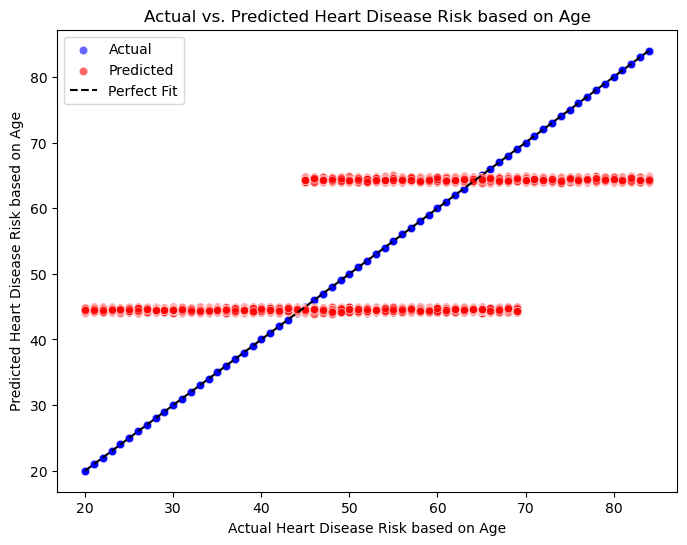

In [164]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)  # Actual values
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted", alpha=0.6)  # Predicted values

# Plot a reference diagonal line (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black", linestyle="--", label="Perfect Fit")

# Labels, title, and legend
plt.xlabel("Actual Heart Disease Risk based on Age")
plt.ylabel("Predicted Heart Disease Risk based on Age")
plt.title("Actual vs. Predicted Heart Disease Risk based on Age")
plt.legend()
plt.show()

In [165]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

                        Coefficient
Heart_Risk                19.979851
Chest_Pain                 0.165821
High_Cholesterol           0.066261
Pain_Arms_Jaw_Back         0.060348
Smoking_1.0                0.059485
Cold_Sweats_Nausea_1.0     0.028936
Sedentary_Lifestyle        0.022417
Dizziness_1.0              0.005896
Swelling                  -0.007757
Obesity                   -0.018716
Shortness_of_Breath       -0.041575
Palpitations_1.0          -0.064072
Diabetes_1.0              -0.074556
Fatigue_1.0               -0.089896
High_BP                   -0.103949
Gender_1.0                -0.107128
Chronic_Stress_1.0        -0.148564
Family_History            -0.150754


In [166]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, Y_pred)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")

R² Score on Training Data: 0.3663
R² Score on Test Data: 0.3665
